# Proyek Analisis Data [Air Quality Dataset]
- **Nama:** Rachel Fasella Christyana
- **Email:** rachelfasella@gmail.com
- **ID Dicoding:** rachelfasella

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara intensitas hujan (0-1) dan tingkat polusi udara (PM2.5)?
- Bagaimana perbandingan karakteristik polusi udara antara bulan dan tahun


## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas matplotlib seaborn streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [13]:
air_data = pd.read_csv('https://raw.githubusercontent.com/rachelfasella/Projek-Analisis-Data/refs/heads/main/PRSA_Data.csv')
air_data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [14]:
air_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
air_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


**Insight:**
- Dataset berhasil diimpor dengan kolom-kolom yang merepresentasikan waktu, cuaca, dan tingkat polusi. Data waktu yang diperlukan untuk analsiis bulanan dan tahunan tersedia, juga ada parameter untuk intensitas hujan yang bernilai dari 0 sampai 1.
- Dataset memiliki x baris dan y kolom termasuk data polutan, parameter cuaca, dan informasi waktu.



### Assessing Data

In [7]:
missing_value = air_data.isnull().sum()
print(f"Nilai yang hilang : \n{missing_value}")

Nilai yang hilang : 
No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64


In [8]:
duplicates = air_data.duplicated().sum()
print(f"Jumlah Data yang Duplikasi :{duplicates}")

Jumlah Data yang Duplikasi :0


In [9]:
data_type = air_data.dtypes
print(f"Tipe Data dari masing-masing field : \n{data_type}")

Tipe Data dari masing-masing field : 
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


**Insight:**
- Terdapat missing values pada kolom penting, termasuk PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM.
- Tidak terdapat duplikasi data
- Tipe data sudah sesuai dengan keperluan analisis

### Cleaning Data

In [10]:
numeric_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

for col in numeric_cols:
    air_data[col].interpolate(method='linear', limit_direction='forward', inplace=True)

air_data['wd'].fillna(method='ffill', inplace=True)

Missing_value = air_data.isnull().sum()
print(f"Menghilangkan Missing Value \nHasil : \n{Missing_value}\n")


Menghilangkan Missing Value 
Hasil : 
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64



<ipython-input-10-604b60291ea4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_data[col].interpolate(method='linear', limit_direction='forward', inplace=True)
<ipython-input-10-604b60291ea4>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

**Insight:**
- Missing value diatasi dengan metode interpolasi.
- Setelah cleaning, tidak ada missing value dan data siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

Bagaimana hubungan antara intensitas hujan (0-1) dan tingkat polusi udara (PM2.5)?


In [11]:
# Pastikan kolom-kolomnya benar
weather_effects = air_data.groupby(['PM2.5', 'RAIN']).agg({
    'RAIN': ['sum', 'max', 'min', 'mean', 'std']
}).reset_index()

weather_effects.head()



PM2.5 RAIN                         
              sum  max  min mean  std
0   2.0  0.0  0.0  0.0  0.0  0.0  0.0
1   3.0  0.0  0.0  0.0  0.0  0.0  0.0
2   3.0  0.1  0.9  0.1  0.1  0.1  0.0
3   3.0  0.2  1.2  0.2  0.2  0.2  0.0
4   3.0  0.3  1.2  0.3  0.3  0.3  0.0

Bagaimana perbandingan karakteristik polusi udara di berbagai waktu ( tahun dengan bulan)

In [12]:
# Mengelompokkan data berdasarkan tahun, bulan, jam, dan menghitung statistik dari metrik polusi
d1 = air_data.groupby(['year', 'month']).agg({
    'PM10': ['sum', 'max', 'min', 'mean', 'std'],
    'SO2': ['sum', 'max', 'min', 'mean', 'std'],
    'NO2': ['sum', 'max', 'min', 'mean', 'std'],
    'CO': ['sum', 'max', 'min', 'mean', 'std'],
    'O3': ['sum', 'max', 'min', 'mean', 'std']
}).reset_index()

# Tampilkan 5 baris pertama hasilnya
d1.head()


year month      PM10                                             SO2  \
                    sum    max  min        mean         std         sum   
0  2013     3   88735.5  835.0  3.0  119.268145  102.455126  24549.5080   
1  2013     4   68125.0  533.0  3.0   94.618056   78.067390  13868.2672   
2  2013     5  121184.0  538.0  6.0  162.881720   81.333354  26321.7576   
3  2013     6   82911.0  430.0  2.0  115.154167   83.599614   7161.9616   
4  2013     7   63906.0  318.0  2.0   85.895161   60.997626   3944.9712   

                     ...        CO                                          \
        max     min  ...       sum     max    min         mean         std   
0  160.0000  3.0000  ...  888866.5  8000.0  100.0  1194.713038  853.682114   
1  110.0000  0.8568  ...  541967.0  3100.0  100.0   752.731944  532.424782   
2  103.9584  2.8560  ...  715722.0  3799.0  200.0   961.991935  479.902537   
3  120.0000  0.2856  ...  781380.0  4500.0  100.0  1085.250000  749.135165   
4   40.0000  0.2856  ...  649092.0  3500.0  100.0   872.435484  572.877941   

           O3                                           
          sum       max     min        mean        std  
0  45937.2165  118.2384  0.6426   61.743571  31.167750  
1  52564.5069  187.0000  2.0000   73.006260  38.896409  
2  97446.0075  332.0000  2.0000  130.975817  70.297196  
3  49221.3119  287.0000  1.2852   68.362933  57.481423  
4  62584.2894  371.0000  2.0000   84.118669  70.483890  

[5 rows x 27 columns]

**Insight:**
- Ketika hujan lebih intens (nilai RAIN mendekati 1), tingkat PM2.5 cenderung menurun. Terdapat indikasi bahwa hujan berkontribusi pada pembersihan udara.
- Polusi udara lebih rendah ketika curah hujan tinggi.


## Visualization & Explanatory Analysis

### Pertanyaan 1:

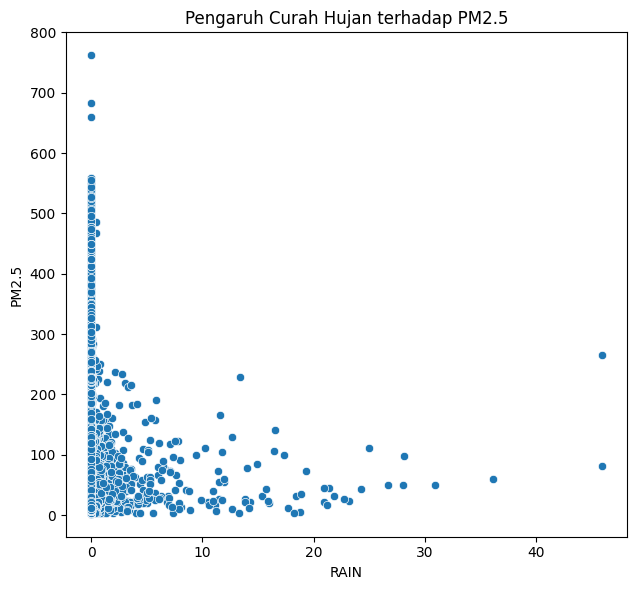

In [15]:
# Visualisasi 1: Pengaruh RAIN terhadap PM2.5
plt.figure(figsize=(18,6))

# Subplot untuk PM2.5
plt.subplot(1, 3, 1)
sns.scatterplot(x='RAIN', y='PM2.5', data=air_data)
plt.title('HUbungan Intensitas Curah Hujan terhadap PM2.5')

plt.tight_layout()
plt.show()


### Pertanyaan 2:

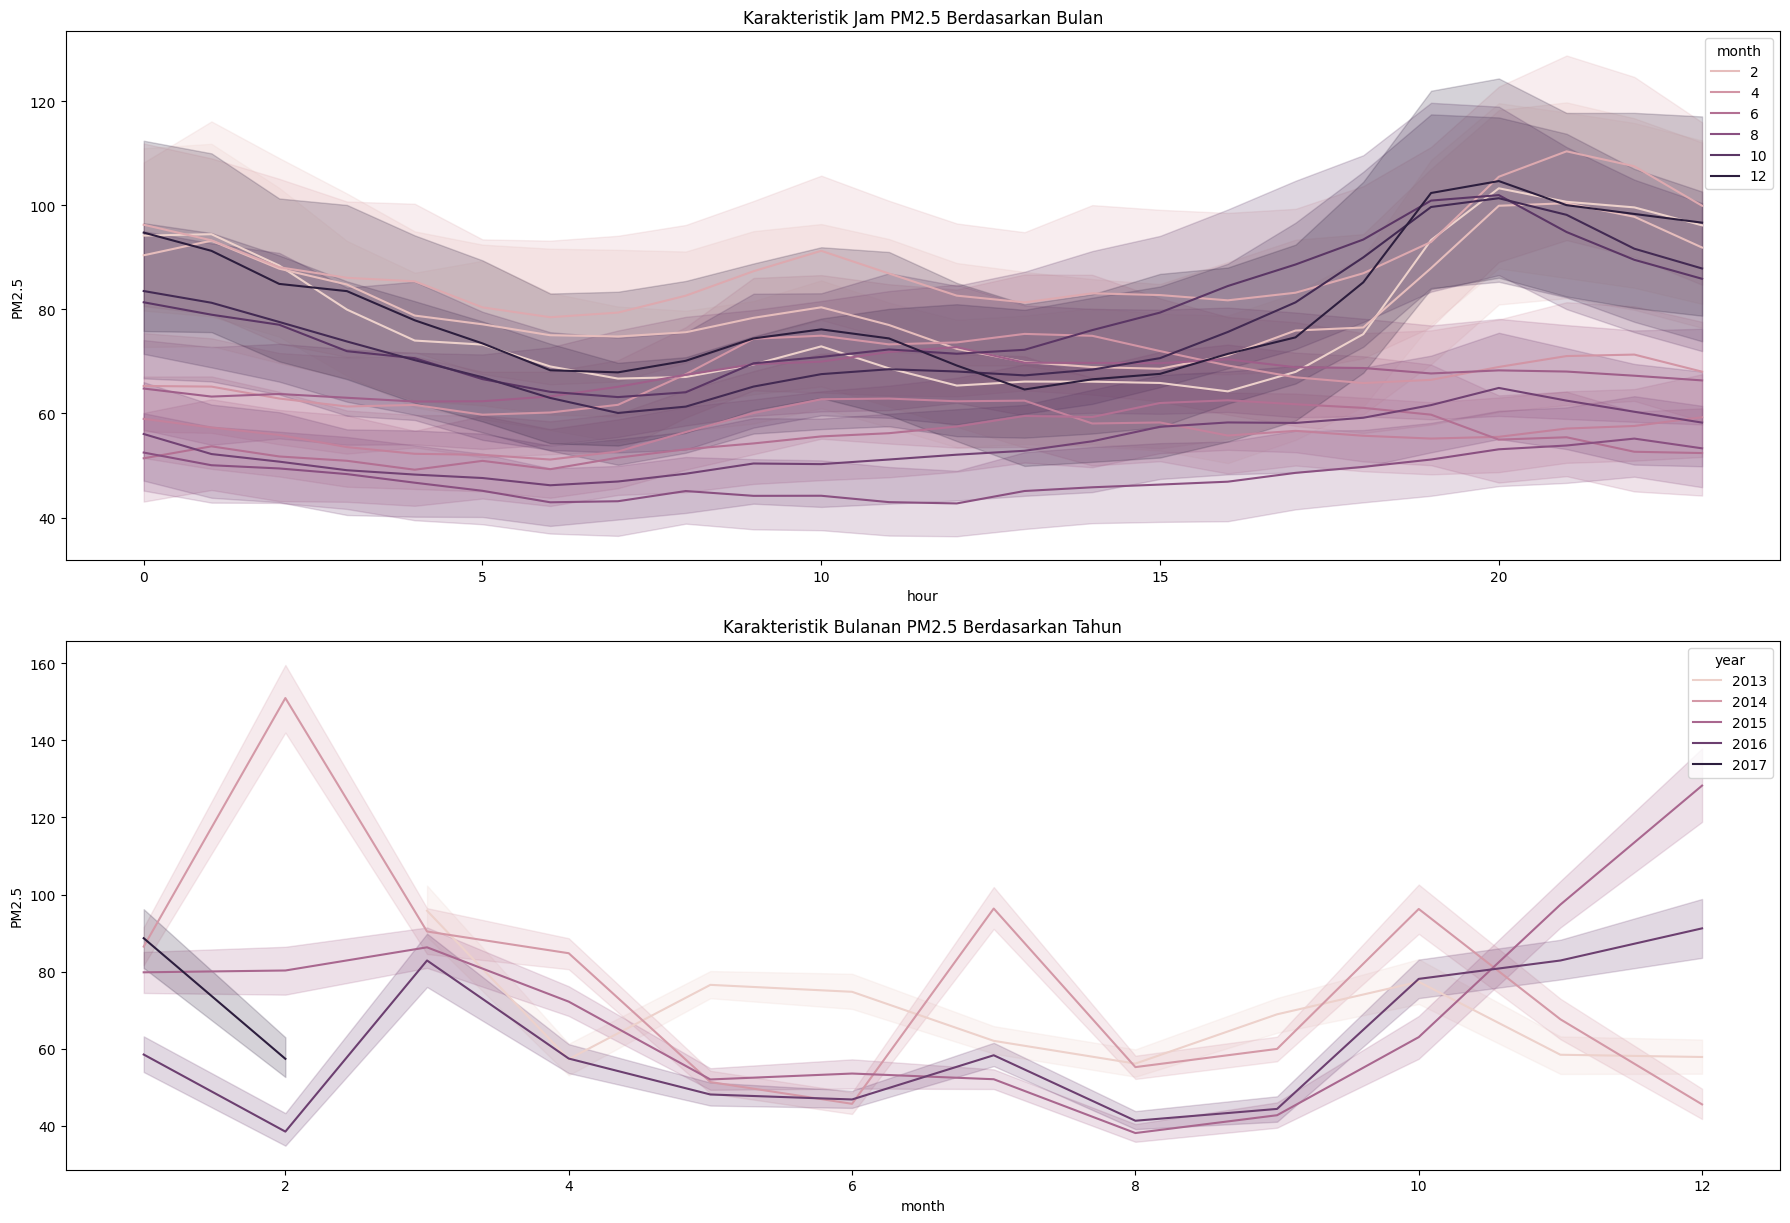

In [16]:
# Visualisasi 2:Perbandingan Karakteristik Polusi PM2.5 di berbagai waktu (tahun dengan bulan)
plt.figure(figsize=(18, 18))

# Subplot untuk PM2.5 berdasarkan jam
plt.subplot(3, 1, 1)
sns.lineplot(x='hour', y='PM2.5', hue='month', data=air_data)
plt.title('Karakteristik Jam PM2.5 Berdasarkan Bulan')

# Subplot untuk PM2.5 berdasarkan bulan
plt.subplot(3, 1, 2)
sns.lineplot(x='month', y='PM2.5', hue='year', data=air_data)
plt.title('Karakteristik Bulanan PM2.5 Berdasarkan Tahun')


plt.tight_layout()
plt.show()


**Insight:**
- Semakin tinggi intensitas hujan maka tingkat PM2.5 menurun
- Pada intensitas hujan yang sangat rendah terdapat variasi PM2.5 yang menunjukkan variasi lebih besar


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion Pertanyaan 1: Hujan berperan signifikan dalam mengurangi tingkat polusi udara, terutama pada partikel PM2.5. Berdasarkan visualisasi yang dibuat, semakin tinggi intensitas hujan maka semakin rendah tingkat PM2.5 di udara.
- Conclusion Pertanyaan 2: Polusi udara mengikuti pola musiman dengan peningkatan yang jelas, karena kondisi atmosfer yang cenderung memerangkap partikel udara.